In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 

%matplotlib widget

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [108]:
parts = pd.read_hdf("../config/ATPC_Bi_ion.h5", "MC/particles")
hits = pd.read_hdf("../config/ATPC_Bi_ion.h5", "MC/hits")

In [109]:
def GetElecronGammaPair(part_event, index):

    gamma_df     = part_event[part_event.particle_name == "gamma"]
    sorted_gamma = gamma_df.sort_values(by="kin_energy", ascending=False)
    prim_gamma   = pd.DataFrame([sorted_gamma.iloc[index]])
    electron     = part_event[part_event.mother_id == prim_gamma.particle_id.iloc[0]]

    if (len(electron) == 0):
        prim_gamma, electron = GetElecronGammaPair(part_event, int(index+1))
    
    return prim_gamma, electron
    


def GetTrueInfoBackground(parts, hits):

    lengths  = []
    energy = []
    creator_procs = []
    event_ids = []
    initial_x = []
    initial_y = []
    initial_z = []
    final_x = []
    final_y = []
    final_z = []
    energies = []
    prim_gamma_E=[]

    for eid in parts.event_id.unique():

        # print("\n\n On event:", eid)

        part_event = parts[parts.event_id == eid]

        # Get the particle ID of the Bi/Tl gamma
        prim_gamma, electron = GetElecronGammaPair(part_event, 0)

        if (len(prim_gamma)  == 0):
            prim_gamma = pd.DataFrame([part_event.loc[part_event[part_event.particle_name == "gamma"].kin_energy.idxmax()]])

        prim_gamma_E.append(prim_gamma.kin_energy.iloc[0])
        initial_x.append(round(prim_gamma.initial_x.iloc[0]))
        initial_y.append(round(prim_gamma.initial_y.iloc[0]))
        initial_z.append(round(prim_gamma.initial_z.iloc[0]))

        # Sometimes the primary gamma escapes
        if (len(electron)  == 0):
                continue

        creator_procs.append(electron.creator_proc.iloc[0])
        final_x.append(round(electron.initial_x.iloc[0])) # This is the position of where the gamma interacted first
        final_y.append(round(electron.initial_y.iloc[0]))
        final_z.append(round(electron.initial_z.iloc[0]))
        
        
        hits_event = hits[hits.event_id == eid]
        energies.append(hits_event.groupby('event_id')['energy'].sum().item())

        event_ids.append(eid)

    return pd.DataFrame({ "event_id": event_ids, "CreatorProc" :creator_procs, "energy": energies, "prim_gamma_E": prim_gamma_E, "initial_x": initial_x, "initial_y": initial_y, "initial_z": initial_z,  "final_x": final_x, "final_y": final_y, "final_z": final_z })

df = GetTrueInfoBackground(parts, hits)
display(df)

,event_id,CreatorProc,energy,prim_gamma_E,initial_x,initial_y,initial_z,final_x,final_y,final_z
0,9800,phot,2.320356,2.447687,-1828,1636,545,-548,723,592
1,9801,phot,2.447687,2.447687,-1820,-938,52,-871,-493,-190
2,9802,phot,2.327524,2.447687,-1000,-1845,1508,33,-1734,432
3,9803,phot,2.447687,2.447687,-328,-1855,-1717,-228,-1586,-1399
4,9804,phot,2.447687,2.447687,-514,1481,1841,-690,366,-1087
5,9805,phot,2.447687,2.447687,-1844,973,745,-71,143,-352
6,9806,phot,2.333096,2.447687,-487,1831,-842,-1678,1269,-1404
7,9807,phot,2.447687,2.447687,-1207,1821,170,1136,-223,272
8,9808,phot,2.447687,2.447687,-1847,597,-1475,-1695,38,-1417
9,9809,phot,2.447687,2.447687,1845,1545,-781,565,648,-418


In [110]:
df.describe()

,event_id,energy,prim_gamma_E,initial_x,initial_y,initial_z,final_x,final_y,final_z
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,9813.000000,2.433767,2.474262,-323.481481,316.370370,-287.629630,-410.296296,74.037037,-221.666667
std,7.937254,0.054208,0.095916,1241.631785,1281.917348,1405.932435,859.053988,935.729435,959.713459
min,9800.000000,2.320356,2.447687,-1847.000000,-1855.000000,-1863.000000,-1695.000000,-1734.000000,-1784.000000
25%,9806.500000,2.447687,2.447687,-1457.000000,-825.500000,-1817.500000,-1102.500000,-697.500000,-946.500000
50%,9813.000000,2.447687,2.447687,-483.000000,580.000000,-577.000000,-314.000000,143.000000,-174.000000
75%,9819.500000,2.447687,2.447687,675.000000,1513.000000,681.500000,77.500000,839.500000,297.500000
max,9826.000000,2.571504,2.826960,1845.000000,1857.000000,1841.000000,1136.000000,1442.000000,1677.000000


[2.109943, 2.447687, 2.8269598]


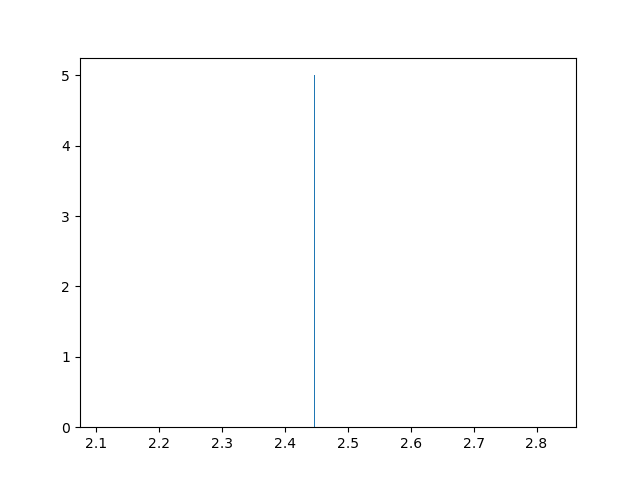

In [104]:
plt.figure()

plt.hist(df[df.energy >2.3].prim_gamma_E, bins = 500);

print(sorted(df[df.energy>2.3].prim_gamma_E.unique()))

In [17]:
# display(parts[parts.event_id == 9803])
display(parts[parts.mother_id == 6])

part_event = parts[ (parts.kin_energy == 2.447687)]
display(part_event)



,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
5,9800,21,e-,0,6,127.396431,1128.777100,618.877502,4.076364,127.396431,...,0.000304,0.004632,0.005032,0.0,0.0,0.0,0.000046,0.000134,phot,msc
6,9800,20,e-,0,6,127.396431,1128.777100,618.877502,4.076364,127.396431,...,-0.000201,-0.001728,-0.006673,0.0,-0.0,0.0,0.000047,0.000028,phot,msc
7,9800,19,e-,0,6,127.396431,1128.777100,618.877502,4.076364,127.396461,...,0.003266,-0.005274,0.003012,-0.0,0.0,0.0,0.000047,0.000118,phot,msc
8,9800,18,e-,0,6,127.396431,1128.777100,618.877502,4.076364,127.396347,...,-0.007827,0.020912,0.008197,-0.0,0.0,0.0,0.000553,0.000964,phot,eIoni
9,9800,17,e-,0,6,127.396431,1128.777100,618.877502,4.076364,127.396446,...,-0.057324,-0.016294,-0.030100,0.0,0.0,0.0,0.004343,0.013283,phot,eIoni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,9805,11,e-,0,6,993.824341,-998.044373,710.627319,1.703375,993.824341,...,0.001378,-0.004427,0.001273,-0.0,-0.0,-0.0,0.000023,0.000025,phot,msc
524,9805,10,e-,0,6,993.824341,-998.044373,710.627319,1.703375,993.824341,...,-0.002253,0.001720,-0.001598,0.0,0.0,0.0,0.000010,0.000026,phot,msc
525,9805,9,gamma,0,6,993.824341,-998.044373,710.627319,1.703375,977.788940,...,-0.022494,0.025329,-0.006029,-0.0,0.0,-0.0,0.034408,24.528133,phot,phot
535,9805,8,e-,0,6,993.824341,-998.044373,710.627319,1.703375,1035.080078,...,2.290142,0.907100,-0.230586,-0.0,-0.0,0.0,2.015238,167.220169,phot,eIoni


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
4,9800,6,gamma,0,2,-309.664337,1276.086304,146.204803,0.001818,127.396431,...,0.608929,-2.147051,1.005261,0.0,0.0,-0.0,2.447687,1221.518066,RadioactiveDecay,phot
95,9801,6,gamma,0,2,-1276.241577,-254.396194,-564.602112,0.004236,265.834564,...,2.126110,-0.551841,1.079953,-0.0,0.0,-0.0,2.447687,2862.293701,RadioactiveDecay,phot
207,9802,6,gamma,0,2,806.729004,1295.853638,-66.343285,0.000067,441.981476,...,-1.411058,-1.628759,1.160703,-0.0,0.0,0.0,2.447687,912.528015,RadioactiveDecay,phot
333,9803,6,gamma,0,2,-982.381653,-1296.722534,-1017.806946,0.000117,-979.792786,...,1.202352,2.040700,0.617304,0.0,-0.0,0.0,2.447687,1225.684448,RadioactiveDecay,phot
410,9804,6,gamma,0,2,-55.924480,-524.699585,1282.903320,0.001542,109.878815,...,0.163597,0.523175,-2.385518,0.0,-0.0,0.0,2.447687,3949.676758,RadioactiveDecay,phot
